In [12]:
# Functional libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Visual libs
from sklearn.metrics import ConfusionMatrixDisplay

# Own functions
from Functions import engineer_features
from Functions import split_data
from Functions import accuracy_scorer


In [7]:
data = pd.read_csv("./FIFA18_players_database/CompleteDataset.csv", low_memory=False)
data = engineer_features(data)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Preferred Positions
0,33,67,67,66,74,70,75,81,72,67,...,73,80,72,43,28,33,44,57,76,CM
1,73,63,70,82,63,57,37,49,69,64,...,59,61,61,15,70,59,23,73,56,ST RM CAM
2,66,65,60,48,55,64,38,38,53,23,...,60,53,48,71,69,58,74,73,36,CB
3,65,47,71,74,67,55,47,57,68,64,...,65,58,65,21,66,53,22,69,54,CAM ST CF
4,70,49,72,65,62,59,60,56,58,56,...,65,64,68,55,64,72,58,71,55,CAM CM CDM


In [10]:
X_train, X_test, y_train, y_test = split_data(data, 0)

In [11]:
# Make and train Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on Test and Train data
y_test_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)

In [13]:
test_accuracy = accuracy_scorer(y_test, y_test_pred)
train_accuracy = accuracy_scorer(y_train, y_train_pred)

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')

Test accuracy: 0.776
Train accuracy: 0.593


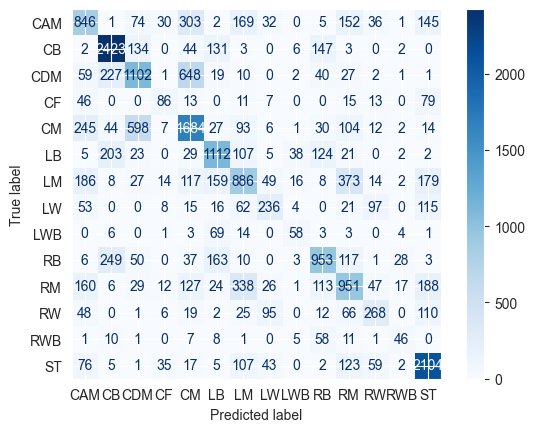

In [14]:
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_train, y_train, cmap="Blues")

Much better than below.. so the model dose good on train but bad on test. Is the model overfitted?

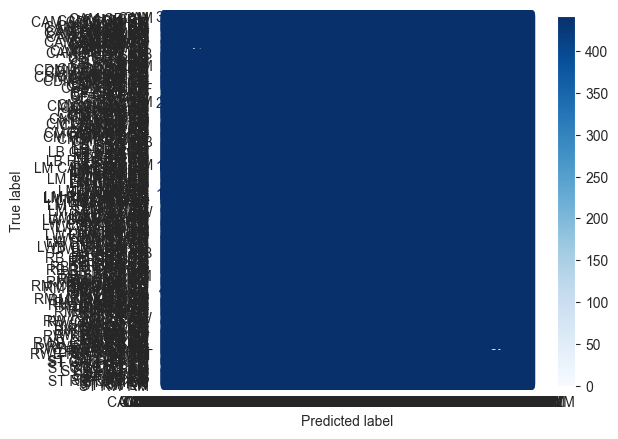

In [15]:
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, cmap="Blues")

CM is classified as CDM, very often.

In [39]:
# Hyperparameters to try
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [41]:
# Find best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


PicklingError: Could not pickle the task to send it to the workers.